## The AND Percepton 
Using Python Classes

In [507]:
import numpy as np
import matplotlib.pyplot as plt

In [508]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array([0., 1., 0., 1.], dtype = np.float32) # If you don't care about precision and space you can use the 32 bit float

y = np.array([0,0,0,1], dtype = int) # Expected output

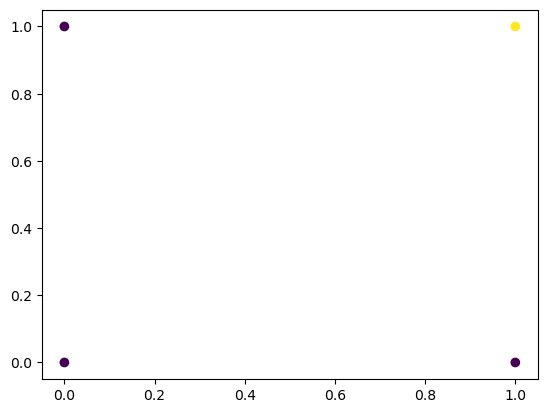

In [509]:
import matplotlib.pyplot as plt
plt.scatter(x1, x2, c=y)

In [510]:
# Repeat the numbers from x1, x2 and y 50 times each
# For example for x1, each element of x1 will be repeated 50 times, so there will be 200 sample points at the end of it
x1 = np.repeat(x1, 50) # This is a vector/aray
x2 = np.repeat(x2, 50) # This is a vector/aray
y = np.repeat(y, 50) # This is a vector/aray

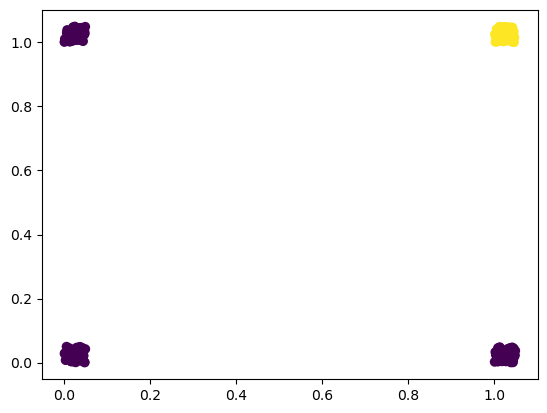

In [511]:
# Add random noise to data points 
# Why??
x1 = x1 + np.random.rand(x1.shape[0])*0.05
x2 = x2 + np.random.rand(x2.shape[0])*0.05

plt.scatter(x1, x2, c = y)

In [512]:
# Combine x1 and x2
X = np.column_stack((x1, x2))

In [513]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (200, 2)
y shape:  (200,)


In [514]:
# Diffusion
# We need to shuffle the index
# Generate indexes from 0 to 199
shuffle_idx = np.arange(y.shape[0])

In [515]:
# Random number generator with a seed
# It is not trully random, but just a pseudo-random
shuffle_rng = np.random.RandomState(42)
shuffle_rng.shuffle(shuffle_idx)

print('Shuffles Indices: ', shuffle_idx)

Shuffles Indices:  [ 95  15  30 158 128 115  69 170 174  45  66 182 165  78 186 177  56 152
  82  68 124  16 148  93  65  60  84  67 125 132   9  18  55  75 150 104
 135 137 164  76  79 197  38  24 122 195  29  19 143  86 114 173   5 126
 117  73 140  98 172  96 169  97  31  12  35 119  42 189  90 136  51 127
 162  41 118 113  26 139 100 111   2  77  46 187 191  85 161  36 190  61
  22 141 101  33  11 194 159   6  27 120   4  32 142 145 109 144  10  62
 112 146 166   0 198 153  70 123  64  44 163  28  40 108 155 156  25  23
 184 147  81  39 168  47  94 154  43 138   3 105  53 133 180 178 185  49
  80  34   7 110  91  83 176 181  89   8  13  59 171 131  17  72 175 134
 167 183  63  54 107  50 196  58  48  88  21  57 160 192 129  37 157 193
   1  52 149 130 151 103  99 116  87  74 121 199  20 188  71 106  14  92
 179 102]


In [516]:
X, y = X[shuffle_idx], y[shuffle_idx]
# ???? What does this syntax do

split_point = int(0.7 * X.shape[0])

X_train, X_test = X[shuffle_idx[:split_point]], X[shuffle_idx[split_point:]] 
# ??? What is this colon notation
y_train, y_test = y[shuffle_idx[:split_point]], y[shuffle_idx[split_point:]]

In [517]:
# Normalisation (zero mean, unit variance)
# When axis is 0, you are doing an operation across rows. When doing axis = 1, it is an operation across columns
# We only need the mean and variance for the training data set because is the one used by the machine to learn
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

print('zero mean: ', mu)
print('unit variance(standard deviation): ', sigma)

X_train = (X_train - mu) /sigma
X_test = (X_test - mu) /sigma

zero mean:  [0.49072585 0.53083149]
unit variance(standard deviation):  [0.49785045 0.50170756]


In [518]:
np.zeros((3,1), dtype = float)

array([[0.],
       [0.],
       [0.]])

In [519]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype = float)
        self.bias = np.zeros((1,), dtype = float)
        
    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
    
    def backward(self, x, y):
        predictions = self.forward(x) # predictions is the output
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                # Doing reshape(-1) reduces the array to 1 dimension 
                self.errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                # Bring weights to the same shape as original weights
                self.weights += (self.errors * x[i]).reshape(self.num_features, 1) 
                # bias is like a weight, but we appended 1 as the multiplicant(like x). The x of bias is 1
                # 1 could be left out because it is inconsequential
                self.bias += self.errors * 1 
                
    # Inference
    # It's a single forward pass so we don't need epoch
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y)/y.shape[0]
        return accuracy


In [520]:
ppn = Perceptron(num_features = 2)

In [521]:
ppn.train(X_train, y_train, epochs = 5)

print("Model Parameters")
print("Weights: ", ppn.weights)
print("Weights: ", ppn.bias)

Model Parameters
Weights:  [[0.91314708]
 [1.13276579]]
Weights:  [-1.]


In [522]:
accuracy = ppn.evaluate(X_test, y_test)

print('accuracy: ', accuracy)

accuracy:  1.0
